In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
from importlib import reload
import scipy.interpolate as scint
import ternary

from datetime import datetime

import better_mob as bm
import pandas as pd

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [3]:
from importlib import reload
reload(bm)

<module 'better_mob' from '/home/cotton/Documents/ConfirmationThesis/makeFigs/CIPS_paper_scripts/better_mob.py'>

In [5]:
plt.rc('font', family='STIXGeneral')
r=(216,27,96)
r='#D81B60'
r='#ff6600' #changed to the new orange
r='#be0f34'
b=(30,136,229)
b='#1E88E5'
b='#1E88E5'
ob='#002147'
g=(0,77,64)
g='#004D40'
g='#007770'
y=(255,193,7)
y='#FFC107'
y='#f5cf47'

# top = np.array([np.array([255,193,7, 256])/256]*128)
# top = np.array([np.array([150,150,150,256])/256]*128)
# bottom = np.array([np.array([256,256,256,0])/256]*128)
# newcolors = np.vstack((top, bottom))
# newcolors = np.vstack((bottom, top))
# newcmp = ListedColormap(newcolors)
# plt.matshow(np.random.rand(25, 25), cmap=newcmp)

In [6]:
enz_star=0.15
del_mu=8.0
del_e=-5.0
k_spo=1.0
k_cat=1
Dpe=4.0
Dse=1.0
v_rat=20.0

phie0=0.15

#Additional Parameters for ternary
Dps=10
v_s = 1
v_w = v_s
Dew=10
Dsw=10
Dpw=10

In [11]:
k_cat_tanfile = './20210907180535_tangent.csv'
df = pd.read_csv(k_cat_tanfile)
df['phi1mid'] = ((df['phiE1hi']+df['phiE1low'])/2)
df['phi2mid'] = (df['phiE2hi']+df['phiE2low'])/2
df = df[df['phiE1hi'] != 1]

vol1 = df[['k_cat','phi1mid']].copy().rename(columns={'k_cat': 'k_cat', 'phi1mid': 'binod'})
vol2 = df[['k_cat','phi2mid']].copy().rename(columns={'k_cat': 'k_cat', 'phi2mid': 'binod'})
k_cat_ordered = pd.concat([vol1, vol2]).sort_values('binod')

cks = scint.CubicSpline(k_cat_ordered['binod'], k_cat_ordered['k_cat'])

del_mu_tanfile = './20211122183752_tangent.csv'
df = pd.read_csv(del_mu_tanfile)
df['phi1mid'] = ((df['phiE1hi']+df['phiE1low'])/2)
df['phi2mid'] = (df['phiE2hi']+df['phiE2low'])/2
df = df[df['phiE1hi'] != 1]

vol1 = df[['del_mu','phi1mid']].copy().rename(columns={'del_mu': 'del_mu', 'phi1mid': 'binod'})
vol2 = df[['del_mu','phi2mid']].copy().rename(columns={'del_mu': 'del_mu', 'phi2mid': 'binod'})
del_mu_ordered = pd.concat([vol1, vol2]).sort_values('binod')

cmus = scint.CubicSpline(del_mu_ordered['binod'], del_mu_ordered['del_mu'])

k_cats, enzs_k = np.meshgrid(np.arange(0.1, 1.9, .02), np.arange(0.0001, 0.4, 0.01))
del_mus, enzs_mu = np.meshgrid(np.arange(2, 10, .05), np.arange(0.0001, 0.4, 0.01))
enzx = np.arange(np.min(k_cat_ordered['binod']), np.max(k_cat_ordered['binod']), 0.001)

In [12]:
sys = [enz_star, del_mu, del_e, k_spo, k_cat, Dpe, Dse, v_rat]
sys_label = ['enz_star', 'del_mu', 'del_e', 'k_spo', 'k_cat', 'Dpe', 'Dse', 'v_rat']
title = ''
for lab, val in zip(sys_label, sys):
    if np.size(val) == 1:
        title += '{}: '.format(bm.labels[lab])
        title += '{0:.3g}, '.format(val)
title = title[:-2]

In [13]:
efile, sfile, pfile = './new5000e.txt', './new5000s.txt', './new5000p.txt',;
edata = np.genfromtxt(efile, delimiter=',')[1:, :]
sdata = np.genfromtxt(sfile, delimiter=',')[1:, :]
pdata = np.genfromtxt(pfile, delimiter=',')[1:, :]

/home/cotton/Documents/ConfirmationThesis/makeFigs/CIPS_paper_scripts/better_mob.py:118: RuntimeWarning: invalid value encountered in scalar divide
  Cprime[0, 0] = (Mse+Mpe+Mwe)*q2/enz_star + Mwe*v_e*q2/(v_w*wat_star)
/home/cotton/Documents/ConfirmationThesis/makeFigs/CIPS_paper_scripts/better_mob.py:119: RuntimeWarning: invalid value encountered in scalar divide
  Cprime[0, 1] = -Mse*v_e*q2/(v_s*sub_star) + Mwe*v_e*q2/(v_w*wat_star)
/home/cotton/Documents/ConfirmationThesis/makeFigs/CIPS_paper_scripts/better_mob.py:120: RuntimeWarning: invalid value encountered in scalar divide
  Cprime[0, 2] = -Mpe*v_e*q2/(v_s*prod_star) + Mwe*v_e*q2/(v_w*wat_star)
/home/cotton/Documents/ConfirmationThesis/makeFigs/CIPS_paper_scripts/better_mob.py:122: RuntimeWarning: invalid value encountered in scalar divide
  Cprime[1, 0] = -Mse*q2/enz_star - RE + Mws*v_s*q2/(v_w*wat_star)
/home/cotton/Documents/ConfirmationThesis/makeFigs/CIPS_paper_scripts/better_mob.py:124: RuntimeWarning: invalid value encoun

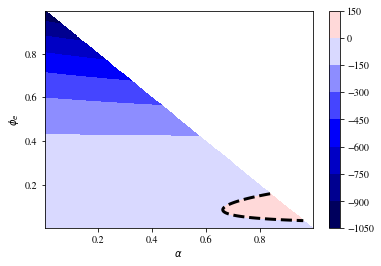

In [14]:
alphas, enz_stars = np.meshgrid(np.arange(0.002, 0.998, 0.002), np.arange(0.002, 0.998, 0.002))
resultss = np.zeros(np.shape(enz_stars))

for i in range(np.shape(enz_stars)[0]):
    for j in range(np.shape(enz_stars)[1]):
        resultss[i, j] = bm.tern_inst(del_mu, del_e, enz_stars[i, j], k_spo,\
                                      k_cat, Dpe, Dse, Dps, v_rat*v_s, v_s, v_w, alphas[i, j], Dew, Dsw, Dpw)
z_scale = max(np.nanmax(resultss), -1*np.nanmin(resultss))
plt.contourf(alphas, enz_stars, resultss, vmin=-z_scale, vmax=z_scale, cmap='seismic')
plt.colorbar()
tern_cont = plt.contour(alphas, enz_stars, resultss, 0, colors=('k',), linestyles=('--',), linewidths=(3,))
plt.xlabel(bm.labels['alpha'])
plt.ylabel(bm.labels['enz_star']);

alph_enz_sub = tern_cont.allsegs[1][0]
alph_enz_sub = np.c_[alph_enz_sub, 1-np.sum(alph_enz_sub, 1)]
enz_alph_sub = np.c_[alph_enz_sub[:, 1], alph_enz_sub[:, 0], alph_enz_sub[:, 2]]
sub_alph_enz = np.c_[alph_enz_sub[:, 2], alph_enz_sub[:, 0], alph_enz_sub[:, 1]]
enz_sub_alph = np.c_[alph_enz_sub[:, 1], alph_enz_sub[:, 2], alph_enz_sub[:, 0]]

/tmp/ipykernel_600753/755984255.py:139: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig1.tight_layout()


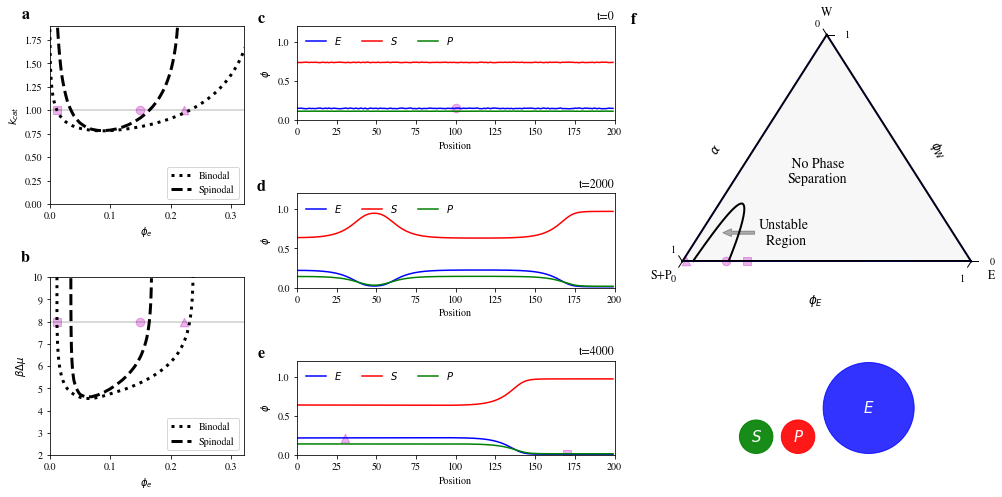

In [15]:
marksize = 75

fig1 = plt.figure(figsize=(14, 7), constrained_layout=True)
gs = fig1.add_gridspec(6, 8)
f1_ax1 = fig1.add_subplot(gs[0:3, :2])
f1_ax2 = fig1.add_subplot(gs[3:, :2])
f1_ax3 = fig1.add_subplot(gs[:2, 2:5])
f1_ax4 = fig1.add_subplot(gs[2:4, 2:5])
f1_ax5 = fig1.add_subplot(gs[4:, 2:5])
f1_ax6 = fig1.add_subplot(gs[0:4, 5:])
f1_ax7 = fig1.add_subplot(gs[4:, 5:])
#Plot Binodals and Spinodals

z_kcat = bm.inst_cond(del_mu, del_e, enzs_k, k_spo, k_cats, Dpe, Dse, v_rat)
z_mu = bm.inst_cond(del_mus, del_e, enzs_mu, k_spo, k_cat, Dpe, Dse, v_rat)

f1_ax1.plot(enzx, cks(enzx), 'k:', lw=3, label='Binodal')
f1_ax1.contour(enzs_k, k_cats, z_kcat, 0, colors=('k',), linestyles=('--',), linewidths=(3,))
# plt.suptitle(title)
f1_ax1.set_ylim(0, 1.9)
f1_ax1.set_xlim(0, 0.32)
f1_ax1.axhline(k_cat, c='k', alpha=0.2)

f1_ax1.set_xlabel(bm.labels['enz_star']);
f1_ax1.set_ylabel(bm.labels['k_cat'])
f1_ax1.plot([], [], color='k', linestyle='--', linewidth=3, label='Spinodal')
f1_ax1.legend(loc='lower right')

f1_ax2.plot(enzx, cmus(enzx), 'k:', lw=3, label='Binodal')
f1_ax2.contour(enzs_mu, del_mus, z_mu, 0, colors=('k',), linestyles=('--',), linewidths=(3,))
# plt.suptitle(title)
f1_ax2.set_ylim(2, 10)
f1_ax2.set_xlim(0, 0.32)
f1_ax2.axhline(del_mu, c='k', alpha=0.2)

f1_ax2.set_xlabel(bm.labels['enz_star']);
f1_ax2.set_ylabel(bm.labels['del_mu'])
f1_ax2.plot([], [], color='k', linestyle='--', linewidth=3, label='Spinodal')
f1_ax2.legend(loc='lower right')

# f1_ax1.scatter(phie0, k_cat_sys, c='k', alpha=0.5)
# dot_hi  = f1_ax1.scatter(phie0, k_cat_sys, c='b', alpha=0.8)
# dot_low  = f1_ax1.scatter(phie0, k_cat_sys, c='b', alpha=0.8)

#Plot Evolution of system

frames = [0, 2000, 4000]
for ax, frame in zip([f1_ax3, f1_ax4, f1_ax5], frames):
    ax.plot(edata[frame, :], 'b', label='$E$')
    ax.plot(sdata[frame, :], 'r', label='$S$')
    ax.plot(pdata[frame, :], 'g', label='$P$')
    ax.set_ylabel('$\phi$');
    ax.set_xlabel('Position');
    ax.set_ylim(0, 1.2)
    ax.set_xlim(0, 200)
    ax.legend(ncol=3, loc='upper left', frameon=False)
    ax.set_title('t={}'.format(frame), loc='right') #, fontdict={'fontweight':'bold'}
    
    
hi_end, low_end = np.max(edata[frames[-1], :]), np.min(edata[frames[-1], :])

f1_ax1.scatter(hi_end,k_cat, marker='^', s=marksize, alpha=0.3, c='m')
f1_ax1.scatter(enz_star,k_cat, marker='o', s=marksize, alpha=0.3, c='m')
f1_ax1.scatter(low_end,k_cat, marker='s', s=marksize, alpha=0.3, c='m')

f1_ax2.scatter(hi_end,del_mu, marker='^', s=marksize, alpha=0.3, c='m')
f1_ax2.scatter(enz_star,del_mu, marker='o', s=marksize, alpha=0.3, c='m')
f1_ax2.scatter(low_end,del_mu, marker='s', s=marksize, alpha=0.3, c='m')


f1_ax3.scatter(100, enz_star, marker='o', s=marksize, alpha=0.3, c='m')

f1_ax5.scatter(30, hi_end, marker='^', s=marksize, alpha=0.3, c='m')
f1_ax5.scatter(170, low_end, marker='s', s=marksize, alpha=0.3, c='m')

scale=1
figure, tax = ternary.figure(ax = f1_ax6, scale=scale)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color="blue", multiple=5)

# Set Axis labels and Title
fontsize = 12
offset = 0.14
# tax.set_title("Various Lines\n", fontsize=fontsize)
tax.left_axis_label("$\\alpha$", fontsize=fontsize, offset=offset)
tax.right_axis_label("$\\phi_W$", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("$\\phi_E$", fontsize=fontsize, offset=offset)

tax.plot(enz_sub_alph, linewidth=2, color='k')
tax.ticks(axis='lbr', multiple=1, linewidth=1, offset=0.025)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

tax.scatter([(hi_end,0, 1-hi_end)], marker='s', s=marksize, alpha=0.3, c='m')
tax.scatter([(enz_star,0, 1-enz_star)], marker='o', s=marksize, alpha=0.3, c='m')
tax.scatter([(low_end,0, 1-low_end)], marker='^', s=marksize, alpha=0.3, c='m')
# tax.scatter([(enz_star,0, 1-hi_end)], marker='p', s=150, alpha=0.3, c='m')
# tax.scatter([(low_end,0, 1-hi_end)], marker='X', s=150, alpha=0.3, c='m')
# tax.heatmap(resultss, style="hexagonal", cmap= colorbar=False)


tax.right_corner_label("E", fontsize=fontsize)
tax.top_corner_label("W", fontsize=fontsize)
tax.left_corner_label("S+P", fontsize=fontsize)
tax.ax.arrow(0.25, 0.11, -0.08, 0, alpha=0.3, width=.012, head_width=.03, head_length=.03, color='k')
tax.ax.text(0.365, 0.3, ' No Phase\nSeparation', fontsize=fontsize+2)
tax.ax.text(0.265, 0.065, 'Unstable\n  Region', fontsize=fontsize+2)

f1_ax1.text(-0.1, 1.1, 'a', transform=f1_ax1.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

axees = [f1_ax2, f1_ax3, f1_ax4, f1_ax5]
letlabs = ['b', 'c', 'd', 'e']
for ax, letlab in zip(axees, letlabs):
    ax.text(-0.1, 1.15, letlab, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
    
f1_ax6.text(-0.1, 1.05, 'f', transform=f1_ax6.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

f1_ax7.axis('off')
big_rad = v_rat**(1/3)
big_area = v_rat**(2/3)
circS = plt.Circle((1, 1), radius=1, color='g', alpha=0.9)
circP = plt.Circle((3.5, 1), radius=1, color='r', alpha=0.9)
circE = plt.Circle((5+(big_rad), big_rad), radius=big_rad, color='b', alpha=0.8)
f1_ax7.add_patch(circE)
f1_ax7.add_patch(circS)
f1_ax7.add_patch(circP)

f1_ax7.set(xlim=[-0.1, 5.1+2*big_rad], ylim=[-0.1, 0.1+2*big_rad])
f1_ax7.set_aspect('equal')

f1_ax7.text(1,1,'$S$', ha='center', va='center', fontsize=15, color='w', fontweight='bold')
f1_ax7.text(3.5,1,'$P$', ha='center', va='center', fontsize=15, color='w', fontweight='bold')
f1_ax7.text(5+(big_rad), big_rad, '$E$', ha='center', va='center', fontsize=15, color='w', fontweight='bold')
fig1.tight_layout()

/home/cotton/Documents/ConfirmationThesis/makeFigs/CIPS_paper_scripts/better_mob.py:118: RuntimeWarning: invalid value encountered in scalar divide
  Cprime[0, 0] = (Mse+Mpe+Mwe)*q2/enz_star + Mwe*v_e*q2/(v_w*wat_star)
/home/cotton/Documents/ConfirmationThesis/makeFigs/CIPS_paper_scripts/better_mob.py:119: RuntimeWarning: invalid value encountered in scalar divide
  Cprime[0, 1] = -Mse*v_e*q2/(v_s*sub_star) + Mwe*v_e*q2/(v_w*wat_star)
/home/cotton/Documents/ConfirmationThesis/makeFigs/CIPS_paper_scripts/better_mob.py:120: RuntimeWarning: invalid value encountered in scalar divide
  Cprime[0, 2] = -Mpe*v_e*q2/(v_s*prod_star) + Mwe*v_e*q2/(v_w*wat_star)
/home/cotton/Documents/ConfirmationThesis/makeFigs/CIPS_paper_scripts/better_mob.py:122: RuntimeWarning: invalid value encountered in scalar divide
  Cprime[1, 0] = -Mse*q2/enz_star - RE + Mws*v_s*q2/(v_w*wat_star)
/home/cotton/Documents/ConfirmationThesis/makeFigs/CIPS_paper_scripts/better_mob.py:124: RuntimeWarning: invalid value encoun

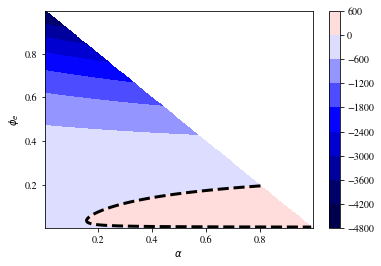

In [16]:
v_rat_extr = 80

resultss_extr = np.zeros(np.shape(enz_stars))

for i in range(np.shape(enz_stars)[0]):
    for j in range(np.shape(enz_stars)[1]):
        resultss_extr[i, j] = bm.tern_inst(del_mu, del_e, enz_stars[i, j], k_spo,\
                                      k_cat, Dpe, Dse, Dps, v_rat_extr*v_s, v_s, v_w, alphas[i, j], Dew, Dsw, Dpw)
z_scale_extr = max(np.nanmax(resultss), -1*np.nanmin(resultss_extr))
plt.contourf(alphas, enz_stars, resultss_extr, vmin=-z_scale_extr, vmax=z_scale_extr, cmap='seismic')
plt.colorbar()
tern_cont_extr = plt.contour(alphas, enz_stars, resultss_extr, 0, colors=('k',), linestyles=('--',), linewidths=(3,))
plt.xlabel(bm.labels['alpha'])
plt.ylabel(bm.labels['enz_star']);

alph_enz_sub_extr = tern_cont_extr.allsegs[1][0]
alph_enz_sub_extr = np.c_[alph_enz_sub_extr, 1-np.sum(alph_enz_sub_extr, 1)]
enz_alph_sub_extr = np.c_[alph_enz_sub_extr[:, 1], alph_enz_sub_extr[:, 0], alph_enz_sub_extr[:, 2]]
sub_alph_enz_extr = np.c_[alph_enz_sub_extr[:, 2], alph_enz_sub_extr[:, 0], alph_enz_sub_extr[:, 1]]
enz_sub_alph_extr = np.c_[alph_enz_sub_extr[:, 1], alph_enz_sub_extr[:, 2], alph_enz_sub_extr[:, 0]]

Text(-0.1, 1.1, '(d)')

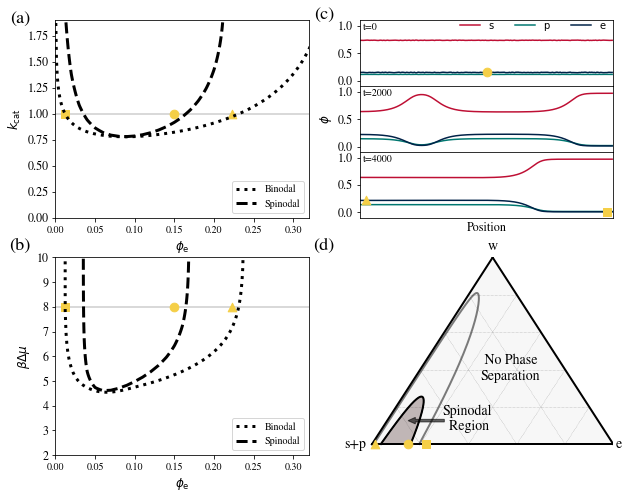

In [17]:
pcol = 'm'
pcol = y
palp = 1

color_region = scint.CubicSpline(enz_sub_alph[::-1, 0], enz_sub_alph[::-1, 2])

def tern_plot(p):
    if p[0] < np.max(enz_sub_alph[:, 0]) and p[2] >= color_region(p[0]):
        return 2.5
    else:
        return 1.5


val_big = np.log(np.max(np.abs(resultss)))
val_big=1

marksize = 75

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 8))
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)

inners=[1, 3, 1, 1]

for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(inners[i], 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0)

    for j in range(inners[i]):
        ax = plt.Subplot(fig, inner[j])
        fig.add_subplot(ax)

f1_ax1, f1_ax3, f1_ax4, f1_ax5, f1_ax2, f1_ax6 = fig.axes

f1_ax3.set_xticks([])
f1_ax4.set_xticks([])
f1_ax5.set_xticks([])
#         ax.set_yticks([])

#Plot Binodals and Spinodals

z_kcat = bm.inst_cond(del_mu, del_e, enzs_k, k_spo, k_cats, Dpe, Dse, v_rat)
z_mu = bm.inst_cond(del_mus, del_e, enzs_mu, k_spo, k_cat, Dpe, Dse, v_rat)

f1_ax1.plot(enzx, cks(enzx), 'k:', lw=3, label='Binodal')
f1_ax1.contour(enzs_k, k_cats, z_kcat, 0, colors=('k',), linestyles=('--',), linewidths=(3,))
# plt.suptitle(title)
f1_ax1.set_ylim(0, 1.9)
f1_ax1.set_xlim(0, 0.32)
f1_ax1.axhline(k_cat, c='k', alpha=0.2, zorder=0)

f1_ax1.set_xlabel('$\phi_\mathrm{e}$', fontsize=12);
f1_ax1.set_ylabel('$k_\mathrm{cat}$', fontsize=12)
f1_ax1.tick_params(axis='y', labelsize=12)
f1_ax1.plot([], [], color='k', linestyle='--', linewidth=3, label='Spinodal')
f1_ax1.legend(loc='lower right')

f1_ax2.plot(enzx, cmus(enzx), 'k:', lw=3, label='Binodal')
f1_ax2.contour(enzs_mu, del_mus, z_mu, 0, colors=('k',), linestyles=('--',), linewidths=(3,))
# plt.suptitle(title)
f1_ax2.set_ylim(2, 10)
f1_ax2.set_xlim(0, 0.32)
f1_ax2.axhline(del_mu, c='k', alpha=0.2, zorder=0)

f1_ax2.set_xlabel('$\phi_\mathrm{e}$', fontsize=12)
f1_ax2.set_ylabel(bm.labels['del_mu'], fontsize=12)

f1_ax2.tick_params(axis='y', labelsize=12)
f1_ax2.plot([], [], color='k', linestyle='--', linewidth=3, label='Spinodal')
f1_ax2.legend(loc='lower right')

# f1_ax1.scatter(phie0, k_cat_sys, c='k', alpha=0.5)
# dot_hi  = f1_ax1.scatter(phie0, k_cat_sys, c='b', alpha=0.8)
# dot_low  = f1_ax1.scatter(phie0, k_cat_sys, c='b', alpha=0.8)

#Plot Evolution of system

frames = [0, 2000, 4000]
for ax, frame in zip([f1_ax3, f1_ax4, f1_ax5], frames):
    ax.plot(sdata[frame, :], r, label='$\mathrm{s}$')
    ax.plot(pdata[frame, :], g, label='$\mathrm{p}$')
    ax.plot(edata[frame, :], b, label='$\mathrm{e}$')
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(0, 200)
    ax.text(0.01, 0.97, 't={}'.format(frame), transform=ax.transAxes, va='top', ha='left')
    ax.set_xticks([])
    ax.set_yticks([0, 0.5, 1])
    ax.tick_params(axis='y', labelsize=12)
#     ,fontsize=16, fontweight='bold', va='top', ha='right')
f1_ax3.legend(ncol=3, loc=(0.38, 0.75), frameon=False, fontsize=10)
f1_ax4.set_ylabel('$\phi$', fontsize=12);
f1_ax5.set_xlabel('Position', fontsize=12)
    
hi_end, low_end = np.max(edata[frames[-1], :]), np.min(edata[frames[-1], :])

f1_ax1.scatter(hi_end,k_cat, marker='^', s=marksize, alpha=palp, c=pcol)
f1_ax1.scatter(enz_star,k_cat, marker='o', s=marksize, alpha=palp, c=pcol)
f1_ax1.scatter(low_end,k_cat, marker='s', s=marksize, alpha=palp, c=pcol)

f1_ax2.scatter(hi_end,del_mu, marker='^', s=marksize, alpha=palp, c=pcol)
f1_ax2.scatter(enz_star,del_mu, marker='o', s=marksize, alpha=palp, c=pcol)
f1_ax2.scatter(low_end,del_mu, marker='s', s=marksize, alpha=palp, c=pcol)


f1_ax3.scatter(100, enz_star, marker='o', s=marksize, alpha=palp, c=pcol, zorder=3)
f1_ax5.scatter(5, hi_end, marker='^', s=marksize, alpha=palp, c=pcol, zorder=3)
f1_ax5.scatter(195, low_end, marker='s', s=marksize, alpha=palp, c=pcol, zorder=3)

scale=2
figure, tax = ternary.figure(ax = f1_ax6, scale=scale)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
# tax.gridlines(color="blue", multiple=5)

# Set Axis labels and Title
fontsize = 12
offset = 0.05
# tax.set_title("Various Lines\n", fontsize=fontsize)

# tax.left_axis_label("$ \phi_\mathrm{S+P}$", fontsize=fontsize, offset=offset)
# tax.right_axis_label("$\phi_W$", fontsize=fontsize, offset=offset)
# tax.bottom_axis_label("$\phi_E$", fontsize=fontsize, offset=offset)
# tax._labels['right'] = ('$\phi_\mathrm{W}$', (0.45, 0.64, 0), -60, {'fontsize': 12})

tax.right_corner_label("e", fontsize=fontsize+2)
tax.top_corner_label("w", fontsize=fontsize+2)
tax.left_corner_label("s+p", fontsize=fontsize+2)
tax._corner_labels['top'] = ('w', (-0.075, 1.2, 0), 0, {'fontsize': 14})

val_big = 6
# tax.heatmapf(tern_plot, scale=scale, boundary=True, style="triangular", cmap=newcmp, vmin=-val_big, vmax=val_big, colorbar=False)
# cmaps, PiYG, PuOr, seismic, Accent, Paired

tax.plot(enz_sub_alph*scale, linewidth=2, color='k', zorder=3)
tax.plot(enz_sub_alph_extr*scale, linewidth=2, color='k', alpha=0.5, zorder=3)

# tax.ticks(axis='lbr', multiple=1, linewidth=1, offset=0.025)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
patch_edge = np.array([tax.ax.lines[3]._x, tax.ax.lines[3]._y]).transpose()
polygon = mpl.patches.Polygon(patch_edge, True, facecolor='#C0B6B6', edgecolor=(0.0, 0.0, 0.0))
#f8e26e
tax.ax.add_patch(polygon)

tax.scatter([(hi_end*scale,0, (1-hi_end)*scale)], marker='s', s=marksize, alpha=palp, c=pcol, zorder=4)
tax.scatter([(enz_star*scale,0, (1-enz_star)*scale)], marker='o', s=marksize, alpha=palp, c=pcol, zorder=4)
tax.scatter([(low_end*scale,0, (1-low_end)*scale)], marker='^', s=marksize, alpha=palp, c=pcol, zorder=4)

tax.ax.arrow(0.3*scale, 0.11*scale, -0.12*scale, 0, alpha=0.6, width=.012*scale, head_width=.03*scale, head_length=.03*scale, color='k')
tax.ax.text(0.45*scale, 0.3*scale, ' No Phase\nSeparation', fontsize=fontsize+2)
tax.ax.text(0.29*scale, 0.065*scale, 'Spinodal\n  Region', fontsize=fontsize+2)

tax.gridlines(multiple=0.4, color="black", alpha=0.4)

tax.ax.set(xlim=[-0.05*scale, scale], ylim=[-.05*scale, np.sin(np.pi/3)*scale])

f1_ax1.text(-0.1, 1.05, '(a)', transform=f1_ax1.transAxes, fontsize=18, va='top', ha='right')
f1_ax2.text(-0.1, 1.10, '(b)', transform=f1_ax2.transAxes, fontsize=18, va='top', ha='right')
f1_ax3.text(-0.1, 1.20, '(c)', transform=f1_ax3.transAxes, fontsize=18, va='top', ha='right')
f1_ax6.text(-0.1, 1.10, '(d)', transform=f1_ax6.transAxes, fontsize=18, va='top', ha='right')

# fig1.tight_layout()

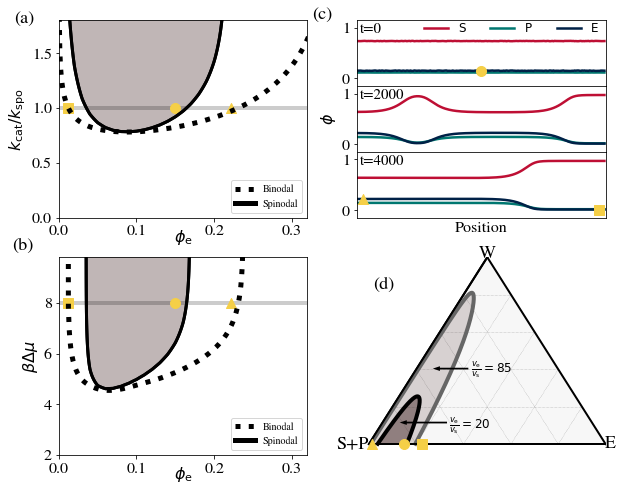

In [18]:
pcol = 'm'
pcol = y
palp = 1

color_region = scint.CubicSpline(enz_sub_alph[::-1, 0], enz_sub_alph[::-1, 2])

def tern_plot(p):
    if p[0] < np.max(enz_sub_alph[:, 0]) and p[2] >= color_region(p[0]):
        return 2.5
    else:
        return 1.5


val_big = np.log(np.max(np.abs(resultss)))
val_big=1

marksize = 100

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(9.8, 8))
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)

inners=[1, 3, 1, 1]

for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(inners[i], 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0)

    for j in range(inners[i]):
        ax = plt.Subplot(fig, inner[j])
        fig.add_subplot(ax)

f1_ax1, f1_ax3, f1_ax4, f1_ax5, f1_ax2, f1_ax6 = fig.axes

f1_ax3.set_xticks([])
f1_ax4.set_xticks([])
f1_ax5.set_xticks([])

#Plot Binodals and Spinodals

z_kcat = bm.inst_cond(del_mu, del_e, enzs_k, k_spo, k_cats, Dpe, Dse, v_rat)
z_mu = bm.inst_cond(del_mus, del_e, enzs_mu, k_spo, k_cat, Dpe, Dse, v_rat)

f1_ax1.plot(enzx, cks(enzx), 'k:', lw=5, label='Binodal')
f1_ax1.contour(enzs_k, k_cats, z_kcat, 0, colors=('k',), linestyles=('-',), linewidths=(3,))
f1_ax1.set_ylim(0, 1.8)
f1_ax1.set_xlim(0, 0.32)
f1_ax1.axhline(k_cat, c='k', alpha=0.2, zorder=0, lw=4)

f1_ax1.set_xlabel('$\phi_\mathrm{e}$', fontsize=16);
f1_ax1.set_ylabel('$k_\mathrm{cat}/k_\mathrm{spo}$', fontsize=16)
f1_ax1.tick_params(axis='y', labelsize=16)
f1_ax1.tick_params(axis='x', labelsize=16)
f1_ax1.plot([], [], color='k', linestyle='-', linewidth=5, label='Spinodal')
f1_ax1.legend(loc='lower right')

allsegs = f1_ax1.contour(enzs_k, k_cats, z_kcat, 0, colors=('k',), linestyles=('-',), linewidths=(3,)).allsegs[1]
f1_ax1.fill(*np.reshape(allsegs, np.shape(allsegs)[1:]).transpose(), c='#C0B6B6', zorder=-1)

f1_ax2.plot(enzx, cmus(enzx), 'k:', lw=5, label='Binodal')
f1_ax2.contour(enzs_mu, del_mus, z_mu, 0, colors=('k',), linestyles=('-',), linewidths=(3,))
f1_ax2.set_ylim(2, 9.8)
f1_ax2.set_xlim(0, 0.32)
f1_ax2.axhline(del_mu, c='k', alpha=0.2, zorder=0, lw=4)

allsegs = f1_ax2.contour(enzs_mu, del_mus, z_mu, 0, colors=('k',), linestyles=('-',), linewidths=(3,)).allsegs[1]
f1_ax2.fill(*np.reshape(allsegs, np.shape(allsegs)[1:]).transpose(), c='#C0B6B6', zorder=-1)

f1_ax2.set_xlabel('$\phi_\mathrm{e}$', fontsize=16)
f1_ax2.set_ylabel(bm.labels['del_mu'], fontsize=16)
f1_ax2.tick_params(axis='y', labelsize=16)
f1_ax2.tick_params(axis='x', labelsize=16)
f1_ax2.plot([], [], color='k', linestyle='-', linewidth=5, label='Spinodal')
f1_ax2.legend(loc='lower right')

#Plot Evolution of system

frames = [0, 2000, 4000]
for ax, frame in zip([f1_ax3, f1_ax4, f1_ax5], frames):
    ax.plot(sdata[frame, :], r, label='$\mathrm{S}$', lw=2.5)
    ax.plot(pdata[frame, :], g, label='$\mathrm{P}$', lw=2.5)
    ax.plot(edata[frame, :], b, label='$\mathrm{E}$', lw=2.5)
    ax.set_ylim(-0.15, 1.15)
    ax.set_xlim(0, 200)
    ax.text(0.01, 0.97, 't={}'.format(frame), transform=ax.transAxes, va='top', ha='left', fontsize=15)
    ax.set_xticks([])
    ax.set_yticks([0, 1])
    ax.tick_params(axis='y', labelsize=16)
#     ,fontsize=16, fontweight='bold', va='top', ha='right')
f1_ax3.legend(ncol=3, loc=(0.25, 0.7), frameon=False, fontsize=12)
f1_ax4.set_ylabel('$\phi$', fontsize=16);
f1_ax5.set_xlabel('Position', fontsize=16)
    
hi_end, low_end = np.max(edata[frames[-1], :]), np.min(edata[frames[-1], :])

f1_ax1.scatter(hi_end,k_cat, marker='^', s=marksize, alpha=palp, c=pcol)
f1_ax1.scatter(enz_star,k_cat, marker='o', s=marksize, alpha=palp, c=pcol)
f1_ax1.scatter(low_end,k_cat, marker='s', s=marksize, alpha=palp, c=pcol)

f1_ax2.scatter(hi_end,del_mu, marker='^', s=marksize, alpha=palp, c=pcol)
f1_ax2.scatter(enz_star,del_mu, marker='o', s=marksize, alpha=palp, c=pcol)
f1_ax2.scatter(low_end,del_mu, marker='s', s=marksize, alpha=palp, c=pcol)


f1_ax3.scatter(100, enz_star, marker='o', s=marksize, alpha=palp, c=pcol, zorder=3)
f1_ax5.scatter(5, hi_end, marker='^', s=marksize, alpha=palp, c=pcol, zorder=3)
f1_ax5.scatter(195, low_end, marker='s', s=marksize, alpha=palp, c=pcol, zorder=3)

scale=2
figure, tax = ternary.figure(ax = f1_ax6, scale=scale)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)

fontsize = 18
offset = 0.05

tax.right_corner_label("E", fontsize=fontsize)
tax.top_corner_label("W", fontsize=fontsize)
tax.left_corner_label("S+P", fontsize=fontsize)
tax._corner_labels['top'] = ('W', (-0.05, 1.15, 0), 0, {'fontsize': fontsize})

val_big = 6
# tax.heatmapf(tern_plot, scale=scale, boundary=True, style="triangular", cmap=newcmp, vmin=-val_big, vmax=val_big, colorbar=False)
# cmaps, PiYG, PuOr, seismic, Accent, Paired

tax.plot(enz_sub_alph*scale, linewidth=4, color='k', zorder=3)
tax.plot(enz_sub_alph_extr*scale, linewidth=4, color='#666666', zorder=3)

# tax.ticks(axis='lbr', multiple=1, linewidth=1, offset=0.025)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

patch_edge2 = np.array([tax.ax.lines[4]._x, tax.ax.lines[4]._y]).transpose()
polygon2 = mpl.patches.Polygon(patch_edge2, True, facecolor='#D7D1D1', edgecolor='#666666', lw=0)
# polygon2 = mpl.patches.Polygon(patch_edge2, True, facecolor='#D7D1D1', edgecolor='#666666', lw=4)
tax.ax.add_patch(polygon2)

patch_edge = np.array([tax.ax.lines[3]._x, tax.ax.lines[3]._y]).transpose()
polygon = mpl.patches.Polygon(patch_edge, True, facecolor='#907F7F', edgecolor=(0.0, 0.0, 0.0))
tax.ax.add_patch(polygon)

tax.scatter([(hi_end*scale,0, (1-hi_end)*scale)], marker='s', s=marksize, alpha=palp, c=pcol, zorder=5)
tax.scatter([(enz_star*scale,0, (1-enz_star)*scale)], marker='o', s=marksize, alpha=palp, c=pcol, zorder=5)
tax.scatter([(low_end*scale,0, (1-low_end)*scale)], marker='^', s=marksize, alpha=palp, c=pcol, zorder=5)

text20 = 'Spinodal Region\n      ' + r'$\frac{v_\mathrm{e}}{v_\mathrm{s}}=20$'
text20 = r'$\frac{v_\mathrm{e}}{v_\mathrm{s}}=20$'
tax.ax.arrow(0.33*scale, 0.1*scale, -0.17*scale, 0, width=.008*scale, head_width=.022*scale, head_length=.03*scale, color='k', lw=0, zorder=4)
# tax.ax.arrow(0.33*scale, 0.1*scale, -0.17*scale, 0, width=.008*scale, head_width=.022*scale, head_length=.03*scale, color='k', lw=0, zorder=4)
tax.ax.text(0.34*scale, 0.07*scale, text20, fontsize=fontsize-6)

text85 = 'Spinodal Region\n      ' + r'$\frac{v_\mathrm{e}}{v_\mathrm{s}}=85$'
text85 = r'$\frac{v_\mathrm{e}}{v_\mathrm{s}}=85$'
tax.ax.arrow(0.42*scale, 0.35*scale, -0.12*scale, 0, width=.008*scale, head_width=.022*scale, head_length=.03*scale, color='k', lw=0, zorder=4)
# tax.ax.text(0.4*scale, 0.30*scale, text85, fontsize=fontsize-6)
tax.ax.text(0.43*scale, 0.33*scale, text85, fontsize=fontsize-6)
# tax.ax.text(0.4*scale, 0.30*scale, 'Spinodal Region\n  $(v_\mathrm{e}/v_\mathrm{s}=85)$', fontsize=fontsize-6)

tax.plot(np.array([[0, 0], [0, 1]])*scale, linewidth=2, color='k', zorder=3)
tax.plot(np.array([[0, 0], [1, 0]])*scale, linewidth=2, color='k', zorder=3)

# tax.gridlines(multiple=0.4, color="black", alpha=0.4)

tax.ax.set(xlim=[-0.05*scale, scale], ylim=[-.05*scale, np.sin(np.pi/3)*scale])

f1_ax1.text(-0.1, 1.05, '(a)', transform=f1_ax1.transAxes, fontsize=18, va='top', ha='right')
f1_ax2.text(-0.1, 1.10, '(b)', transform=f1_ax2.transAxes, fontsize=18, va='top', ha='right')
f1_ax3.text(-0.1, 1.20, '(c)', transform=f1_ax3.transAxes, fontsize=18, va='top', ha='right')
f1_ax6.text(0.15, 0.9, '(d)', transform=f1_ax6.transAxes, fontsize=18, va='top', ha='right')

# fig1.tight_layout()
tax.gridlines(multiple=0.4, color="black", alpha=0.4)

f1_ax1.xaxis.set_label_coords(.5, -.05)
f1_ax2.xaxis.set_label_coords(.5, -.05)



In [26]:
fig.savefig('../../figures/CIPSphase.pdf')

In [13]:
datetime.now().strftime('%d%m%y%H%M%S')
# fig.savefig('./fig2.pdf')
fig.savefig('./fig2_' + datetime.now().strftime('%d%m%y%H%M%S') + '.pdf')

In [32]:
#making some activity plots
enz_star=0.15
del_mu=8.0
del_e=-5.0
k_spo=1.0
k_cat=1
Dpe=4.0
Dse=1.0
v_rat=20.0

phie0=0.15

#Additional Parameters for ternary
Dps=10
v_s = 1
v_w = v_s
Dew=10
Dsw=10
Dpw=10

enzs = np.arange(00.0001, 1-0.0001, 0.0001)

#can use this if k_cat of choice was sampled in tangents

crit_ind = np.argmin(del_mu_ordered['del_mu'])+1

del_mu_ordered_low = del_mu_ordered.iloc[0:crit_ind]
del_mu_ordered_hi = del_mu_ordered.iloc[crit_ind:]

loE = del_mu_ordered_low.iloc[np.argmin(np.abs(del_mu_ordered_low['del_mu'] - del_mu))]['binod']
hiE = del_mu_ordered_hi.iloc[np.argmin(np.abs(del_mu_ordered_hi['del_mu'] - del_mu))]['binod']

act_hiE = hiE*bm.Re(del_mu, del_e, hiE, 1-hiE, k_spo, k_cat)
act_loE = loE*bm.Re(del_mu, del_e, loE, 1-loE, k_spo, k_cat)

instabs = bm.inst_cond(del_mu,del_e,enzs,k_spo,k_cat,Dpe,Dse,v_rat)
instabs_phi_plt = bm.inst_cond(del_mu,del_e,enzs,k_spo,k_cat,Dpe,Dse,v_rat)
one_phase_conv = instabs > 0
two_phase_conv = instabs < 0
one_phase_act_conv = enzs*bm.Re(del_mu, del_e, enzs, 1-enzs, k_spo, k_cat)
two_phase_act_conv = act_hiE*(enzs-loE)/(hiE-loE) + act_loE*(hiE-enzs)/(hiE-loE)

activity_conv = one_phase_act_conv*one_phase_conv + two_phase_act_conv*two_phase_conv

In [33]:
np.arange(2, 10, .005)
minx, maxx = np.min(del_mu_ordered['del_mu']), np.max(del_mu_ordered['del_mu'])
minx, maxx

(4.8000000000000025, 9.920000000000009)

In [34]:
minx, maxx = np.min(del_mu_ordered['binod']), np.max(del_mu_ordered['binod'])
del_mus = np.arange(2, 10, .005)
activities = {}
one_phases = {}
two_phases = {}
bino_splits = {}
has_split = {}

cmus = scint.CubicSpline(del_mu_ordered['binod'], del_mu_ordered['del_mu'])
back_cmus_l = scint.CubicSpline(del_mu_ordered_low['del_mu'][::-1], del_mu_ordered_low['binod'][::-1])
back_cmus_h = scint.CubicSpline(del_mu_ordered_hi['del_mu'], del_mu_ordered_hi['binod'])


# for enz_star in [0.02, critical, 0.15, 0.3]:
a1, a2 = 0.065, 0.15
for enz_star in [a1, a2]:
    print(enz_star)
#     if enz_star >= np.max(xs):
#         one_phase_act = enz_star*bm.Re(del_mu, del_e, enz_star, 1-enz_star, k_spo, k_cats)
#         activities[enz_star] = one_phase_act
#         one_phases[enz_star] = one_phase_act
#     else:
    instabs = bm.inst_cond(del_mus, del_e, enz_star, k_spo, k_cat, Dpe, Dse, v_rat)
    one_phase = instabs > 0
    two_phase = instabs < 0

    #Find the binodal and get the phases at each point
    hiEs = back_cmus_h(del_mus)
    lowEs = back_cmus_l(del_mus)

    #Get the acitvities
    one_phase_act = enz_star*bm.Re(del_mus, del_e, enz_star, 1-enz_star, k_spo, k_cat)
    hi_act = hiEs*bm.Re(del_mus, del_e, hiEs, 1-hiEs, k_spo, k_cat)
    low_act = lowEs*bm.Re(del_mus, del_e, lowEs, 1-lowEs, k_spo, k_cat)
    two_phase_act = hi_act*(enz_star-lowEs)/(hiEs-lowEs) + low_act*(hiEs-enz_star)/(hiEs-lowEs)
    activities[enz_star] = one_phase*one_phase_act + two_phase*two_phase_act
    one_phases[enz_star] = one_phase_act
    two_phases[enz_star] = two_phase_act

    # See if above bino and get the above bino activity
    #need to get this to work if never crosses spino or bino
    above_bino = del_mus > cmus(enz_star)
    below_bino = del_mus <= cmus(enz_star)
    bino_split = below_bino*one_phase_act + above_bino*two_phase_act
    bino_splits[enz_star] = bino_split
    has_split[enz_star] = two_phase

0.065
0.15


In [40]:
del_mus[has_split[a1]]
np.array(one_phases[a1])[has_split[a1]]

array([0.05152696, 0.05155068, 0.0515743 , ..., 0.05668083, 0.05668096,
       0.05668109])

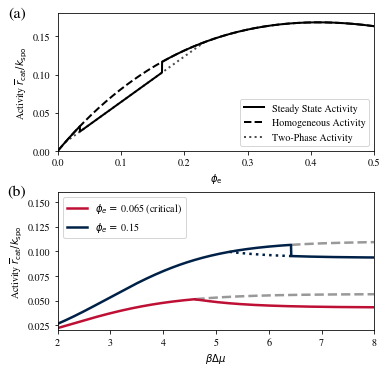

In [44]:
lt = 2

fig2, (f2_ax1, f2_ax2) = plt.subplots(2, 1, figsize=(5.5,5.5))
f2_ax1.plot(enzs, activity_conv, c='k', label='Steady State Activity', lw=lt)
f2_ax1.plot(enzs, one_phase_act_conv, c='k', ls='--', label='Homogeneous Activity', lw=lt)
f2_ax1.set(xlim=[0, 0.5], ylim=[0, 0.18], xlabel='$\phi_\mathrm{e}$', ylabel='Activity $\overline{r}_\mathrm{cat}/k_\mathrm{spo}$')

between = (enzs < hiE)*(enzs > loE)
f2_ax1.plot(enzs[between], two_phase_act_conv[between], c='k', ls=':', alpha=0.7, label='Two-Phase Activity', lw=lt)
# f2_ax1.plot(enzs[between], two_phase_act_conv[between], c='k', alpha=0.4, label='Two Phase Activity')
# linestyle=(0, (3, 1, 1, 1, 1, 1))

# f2_ax1.scatter(hi_end,hi_end*bm.Re(del_mu, del_e, hi_end, 1-hi_end, k_spo, k_cat), marker='^', s=marksize, alpha=palp, c=pcol)
# f2_ax1.scatter(enz_star,enz_star*bm.Re(del_mu, del_e, enz_star, 1-enz_star, k_spo, k_cat), marker='o', s=marksize, alpha=palp, c=pcol)
# f2_ax1.scatter(low_end,low_end*bm.Re(del_mu, del_e, low_end, 1-low_end, k_spo, k_cat), marker='s', s=marksize, alpha=palp, c=pcol)

f2_ax1.legend(loc='lower right')

lt = 2.5

f2_ax2.plot(del_mus, activities[a1], c=r, label='$\phi_e =$ {} (critical)'.format(a1), lw=lt)
f2_ax2.plot(del_mus[has_split[a1]], np.array(one_phases[a1])[has_split[a1]], c='k', ls='--', alpha=0.4, lw=lt, zorder=0)

f2_ax2.plot(del_mus, activities[a2], c=b, label='$\phi_e = $ {}'.format(a2), lw=lt)
f2_ax2.plot(del_mus[has_split[a2]], np.array(one_phases[a2])[has_split[a2]], c='k', ls='--', alpha=0.4, lw=lt, zorder=0) #, label='Homogeneous Activity'

bi2spi = (del_mus > cmus(a2))*one_phase
# plt.plot(del_mus[bi2spi], two_phases[a2][bi2spi], c=b, ls=(0, (3, 1, 1, 1, 1, 1)), lw=lt) #label='Two Phase'
plt.plot(del_mus[bi2spi], two_phases[a2][bi2spi], c=b, ls=':', lw=lt) #label='Two Phase'

# f2_ax2.scatter(1,enz_star*bm.Re(del_mu, del_e, enz_star, 1-enz_star, k_spo, k_cat), marker='o', s=marksize, alpha=palp, c=pcol)

f2_ax2.set(xlim=[2, 8], ylim=[0.02, 0.16], xlabel=bm.labels['del_mu'], ylabel='Activity $\overline{r}_\mathrm{cat}/k_\mathrm{spo}$')
f2_ax2.legend(ncol=1,loc='upper left')

f2_ax1.text(-0.1, 1.05, '(a)', transform=f2_ax1.transAxes,
      fontsize=16, va='top', ha='right')
f2_ax2.text(-0.1, 1.05, '(b)', transform=f2_ax2.transAxes,
      fontsize=16, va='top', ha='right')

# f2_ax1.xaxis.label._y = 250

plt.subplots_adjust(left=0.15,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

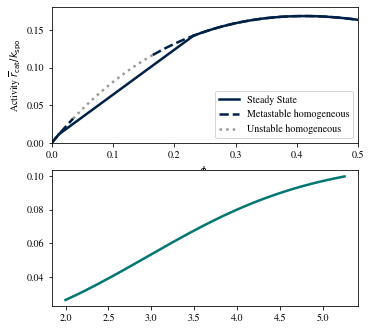

In [45]:
lt = 2.5
bi2spi = (del_mus > cmus(a2))*one_phase
between = (enzs < hiE)*(enzs > loE)
e_upper = (enzs > hiE)
e_lower = (enzs < loE)

meta_upper = (instabs_phi_plt > 0)*(enzs>0.1)
meta_lower = (instabs_phi_plt > 0)*(enzs<0.1)

fig2, (f2_ax1, f2_ax2) = plt.subplots(2, 1, figsize=(5.5,5.5))
f2_ax1.plot(enzs[between], two_phase_act_conv[between], c=b, label='Steady State', lw=lt)
f2_ax1.plot(enzs[e_upper], one_phase_act_conv[e_upper], c=b, lw=lt)
f2_ax1.plot(enzs[e_lower], one_phase_act_conv[e_lower], c=b, lw=lt)
f2_ax1.plot(enzs[meta_upper], one_phase_act_conv[meta_upper], c=b, lw=lt, ls='--', label='Metastable homogeneous')
f2_ax1.plot(enzs[meta_lower], one_phase_act_conv[meta_lower], c=b, lw=lt, ls='--')
f2_ax1.plot(enzs[instabs_phi_plt < 0], one_phase_act_conv[instabs_phi_plt < 0], c='k',alpha=0.4, ls=':', label='Unstable homogeneous', lw=lt)

f2_ax1.set(xlim=[0, 0.5], ylim=[0, 0.18], xlabel='$\phi_\mathrm{e}$', ylabel='Activity $\overline{r}_\mathrm{cat}/k_\mathrm{spo}$')
f2_ax1.legend(loc='lower right')

lt = 2.5

post_split = (del_mus > cmus(a2))
pre_split = (del_mus < cmus(a2))
post_spino = post_split*np.invert(bi2spi)

one_phases[a2][pre_split]
f2_ax2.plot(del_mus[pre_split],activities[a2][pre_split], c=g, label=r'$\phi_\mathrm{e} = $ 0.15', lw=lt)
f2_ax2.plot(del_mus[[post_spino]], np.array(one_phases[a2])[[post_spino]], c='k', ls=':', alpha=0.4, lw=lt, zorder=0) #, label='Homogeneous Activity'
f2_ax2.plot(del_mus[[post_spino]], np.array(two_phases[a2])[[post_spino]], c=g, lw=lt, zorder=0)
f2_ax2.plot(del_mus[[bi2spi]], np.array(two_phases[a2])[[bi2spi]], c=g, lw=lt, zorder=0)
f2_ax2.plot(del_mus[[bi2spi]], np.array(one_phases[a2])[[bi2spi]], c=g, ls='--', lw=lt, zorder=0)

f2_ax2.plot(del_mus, activities[a1], c=r, label='$\phi_\mathrm{e} = $0.065 (critical)', lw=lt)
f2_ax2.plot(del_mus[[has_split[a1]]], np.array(one_phases[a1])[[has_split[a1]]], c='k', ls=':', alpha=0.4, lw=lt, zorder=0)

f2_ax2.set(xlim=[2, 8], ylim=[0.02, 0.16], xlabel=bm.labels['del_mu'], ylabel='Activity $\overline{r}_\mathrm{cat}/k_\mathrm{spo}$')
f2_ax2.legend(ncol=1,loc='upper left')

f2_ax1.text(-0.1, 1.05, '(a)', transform=f2_ax1.transAxes,
      fontsize=16, va='top', ha='right')
f2_ax2.text(-0.1, 1.05, '(b)', transform=f2_ax2.transAxes,
      fontsize=16, va='top', ha='right')

plt.subplots_adjust(left=0.15,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

In [ ]:
fig.savefig('../../figures/CIPSphase.pdf')

In [21]:
datetime.now().strftime('%d%m%y%H%M%S')
# fig2.savefig('./fig3.pdf')
fig2.savefig('./fig3_mu_' + datetime.now().strftime('%d%m%y%H%M%S') + '.pdf')

In [19]:
#making some activity plots
enz_star=0.15
del_mu=8.0
del_e=-5.0
k_spo=1.0
k_cat=1
Dpe=4.0
Dse=1.0
v_rat=20.0

phie0=0.15

#Additional Parameters for ternary
Dps=10
v_s = 1
v_w = v_s
Dew=10
Dsw=10
Dpw=10

enzs = np.arange(00.0001, 1-0.0001, 0.0001)

#can use this if k_cat of choice was sampled in tangents
hiE = np.max(k_cat_ordered[k_cat_ordered['k_cat'] == 1]['binod'])
loE = np.min(k_cat_ordered[k_cat_ordered['k_cat'] == 1]['binod'])

# hiE = interxhi[np.argmin(np.abs(cks(interxhi)-del_mu))]
# loE = interxlo[np.argmin(np.abs(cks(interxlo)-del_mu))]

act_hiE = hiE*bm.Re(del_mu, del_e, hiE, 1-hiE, k_spo, k_cat)
act_loE = loE*bm.Re(del_mu, del_e, loE, 1-loE, k_spo, k_cat)

instabs = bm.inst_cond(del_mu,del_e,enzs,k_spo,k_cat,Dpe,Dse,v_rat)
one_phase_conv = instabs > 0
two_phase_conv = instabs < 0
one_phase_act_conv = enzs*bm.Re(del_mu, del_e, enzs, 1-enzs, k_spo, k_cat)
two_phase_act_conv = act_hiE*(enzs-loE)/(hiE-loE) + act_loE*(hiE-enzs)/(hiE-loE)

activity_conv = one_phase_act_conv*one_phase_conv + two_phase_act_conv*two_phase_conv

In [97]:
k_cats = np.arange(0, 2, 0.01)
minx, maxx = np.min(k_cat_ordered['binod']), np.max(k_cat_ordered['binod'])
activities = {}
one_phases = {}
two_phases = {}
bino_splits = {}
has_split = {}
# for enz_star in [0.02, critical, 0.15, 0.3]:
for enz_star in [0.1, 0.15]:
    print(enz_star)
#     if enz_star >= np.max(xs):
#         one_phase_act = enz_star*bm.Re(del_mu, del_e, enz_star, 1-enz_star, k_spo, k_cats)
#         activities[enz_star] = one_phase_act
#         one_phases[enz_star] = one_phase_act
#     else:
    instabs = bm.inst_cond(del_mu, del_e, enz_star, k_spo, k_cats, Dpe, Dse, v_rat)
    one_phase = instabs > 0
    two_phase = instabs < 0

    #Find the binodal and get the phases at each point
    lowx = np.arange(minx, enz_star, 1e-5)
    low_bino_curve = np.vstack([cks(lowx)]*len(k_cats))
    hix = np.arange(enz_star, maxx, 1e-5)
    hi_bino_curve = np.vstack([cks(hix)]*len(k_cats))
    k_cat_low = np.vstack([k_cats]*np.size(low_bino_curve, axis=1)).transpose()
    k_cat_hi = np.vstack([k_cats]*np.size(hi_bino_curve, axis=1)).transpose()
    hiEs = hix[np.argmin(np.abs(hi_bino_curve - k_cat_hi), axis=1)]
    lowEs = lowx[np.argmin(np.abs(low_bino_curve - k_cat_low), axis=1)]

    #Get the acitvities
    one_phase_act = enz_star*bm.Re(del_mu, del_e, enz_star, 1-enz_star, k_spo, k_cats)
    hi_act = hiEs*bm.Re(del_mu, del_e, hiEs, 1-hiEs, k_spo, k_cats)
    low_act = lowEs*bm.Re(del_mu, del_e, lowEs, 1-lowEs, k_spo, k_cats)
    two_phase_act = hi_act*(enz_star-lowEs)/(hiEs-lowEs) + low_act*(hiEs-enz_star)/(hiEs-lowEs)
    activities[enz_star] = one_phase*one_phase_act + two_phase*two_phase_act
    one_phases[enz_star] = one_phase_act
    two_phases[enz_star] = two_phase_act

    # See if above bino and get the above bino activity
    #need to get this to work if never crosses spino or bino
    above_bino = k_cats > cks(enz_star)
    below_bino = k_cats <= cks(enz_star)
    bino_split = below_bino*one_phase_act + above_bino*two_phase_act
    bino_splits[enz_star] = bino_split
    has_split[enz_star] = two_phase

0.1
0.15
